In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#loading dataset
movies=pd.read_csv("dataset/movies.csv")
ratings=pd.read_csv("dataset/ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
ratings.head()

,userId,movieId,rating,timestamp,rating_norm
0,1,1,4.0,2000-07-30 18:45:03,0.8
1,1,3,4.0,2000-07-30 18:20:47,0.8
2,1,6,4.0,2000-07-30 18:37:04,0.8
3,1,47,5.0,2000-07-30 19:03:35,1.0
4,1,50,5.0,2000-07-30 18:48:51,1.0


In [4]:
#Cheking null values
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,100836
mean,326.127564,19435.295718,3.501557,2008-03-19 17:01:27.368469248
min,1.000000,1.000000,0.500000,1996-03-29 18:36:55
25%,177.000000,1199.000000,3.000000,2002-04-18 09:57:46
50%,325.000000,2991.000000,3.500000,2007-08-02 20:31:02
75%,477.000000,8122.000000,4.000000,2015-07-04 07:15:44.500000
max,610.000000,193609.000000,5.000000,2018-09-24 14:27:30
std,182.618491,35530.987199,1.042529,NaN


In [23]:
print("Ratings Summary:\n", ratings['rating'].describe())

Ratings Summary:
 count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [10]:
#Merge ratings + movies
data = ratings.merge(movies, on='movieId', how='left')
data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi


In [24]:
data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'rating_norm'],
      dtype='object')

In [11]:
# Assuming ratings are from 0.5 to 5
data['rating_norm'] = data['rating'] / 5.0
# Normalize ratings to 0–1 range
ratings['rating_norm'] = ratings['rating'] / ratings['rating'].max()
ratings



,userId,movieId,rating,timestamp,rating_norm
0,1,1,4.0,2000-07-30 18:45:03,0.8
1,1,3,4.0,2000-07-30 18:20:47,0.8
2,1,6,4.0,2000-07-30 18:37:04,0.8
3,1,47,5.0,2000-07-30 19:03:35,1.0
4,1,50,5.0,2000-07-30 18:48:51,1.0
...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,0.8
100832,610,168248,5.0,2017-05-03 22:21:31,1.0
100833,610,168250,5.0,2017-05-08 19:50:47,1.0
100834,610,168252,5.0,2017-05-03 21:19:12,1.0


In [12]:
data.head()

,userId,movieId,rating,timestamp,title,genres,rating_norm
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.8
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,0.8
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,0.8
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1.0


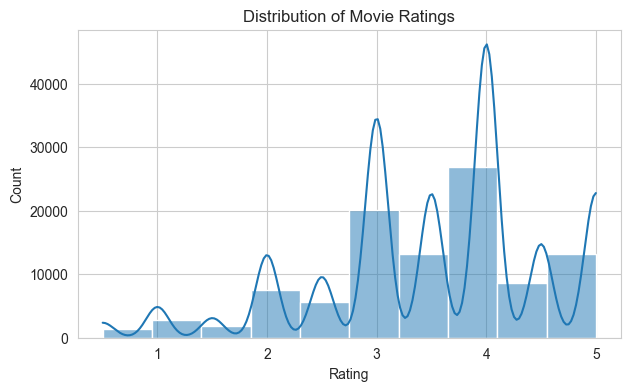

In [13]:
#Count of rating
sns.set_style('whitegrid')

plt.figure(figsize=(7,4))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64


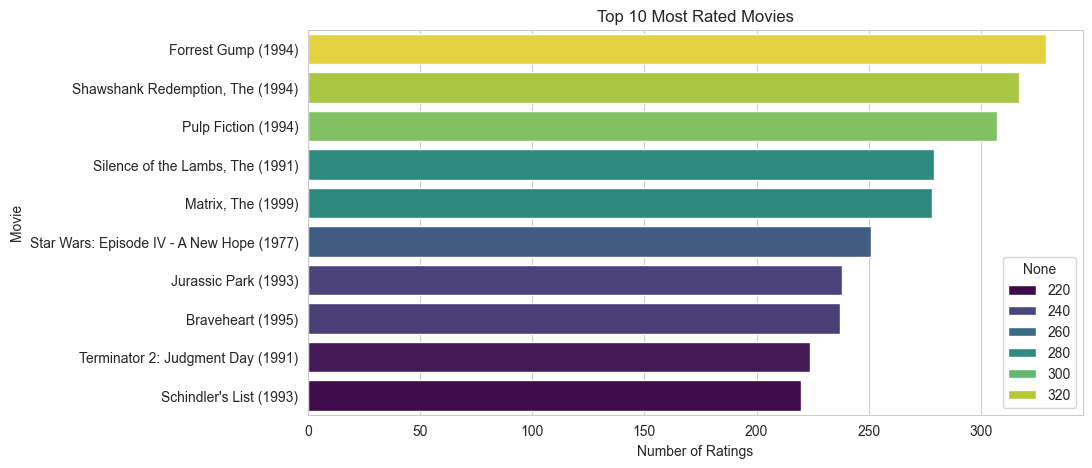

In [14]:
#Most popular movies (most rated)
top_movies = data.groupby('title').size().sort_values(ascending=False).head(10)
print(top_movies)

plt.figure(figsize=(10,5))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis', hue=top_movies)
plt.xlabel('Number of Ratings')
plt.ylabel('Movie')
plt.title('Top 10 Most Rated Movies')
plt.show()


userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
dtype: int64


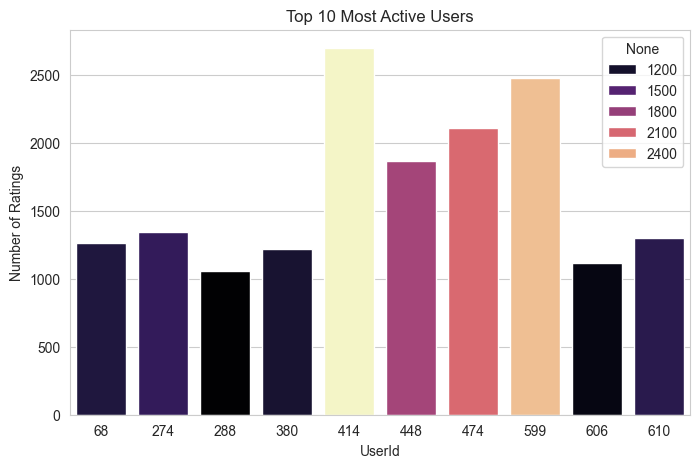

In [15]:
#Most active users
top_users = data.groupby('userId').size().sort_values(ascending=False).head(10)
print(top_users)

plt.figure(figsize=(8,5))
sns.barplot(x=top_users.index, y=top_users.values, palette='magma', hue= top_users)
plt.xlabel('UserId')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Active Users')
plt.show()


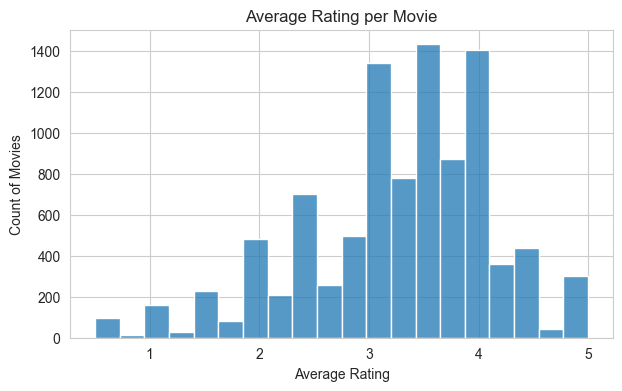

In [16]:
avg_ratings = ratings.groupby('movieId')['rating'].mean()
plt.figure(figsize=(7,4))
sns.histplot(avg_ratings, bins=20)
plt.title("Average Rating per Movie")
plt.xlabel("Average Rating")
plt.ylabel("Count of Movies")
plt.show()

In [17]:
ratings.groupby('movieId')['rating'].mean()

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [18]:
avg_rating = data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating)


title
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990)    5.0
Meantime (1984)                                            5.0
Decalogue, The (Dekalog) (1989)                            5.0
Stand, The (1994)                                          5.0
Big Top Scooby-Doo! (2012)                                 5.0
I Am Not Your Negro (2017)                                 5.0
Trinity and Sartana Are Coming (1972)                      5.0
Trailer Park Boys (1999)                                   5.0
Bitter Lake (2015)                                         5.0
Black Mirror                                               5.0
Name: rating, dtype: float64


In [19]:
num_users = data['userId'].nunique()
num_movies = data['movieId'].nunique()
num_interactions = len(data)

sparsity = 1 - (num_interactions / (num_users * num_movies))
print(f"Number of users: {num_users}")
print(f"Number of movies: {num_movies}")
print(f"Total interactions: {num_interactions}")
print(f"Sparsity of user-item matrix: {sparsity:.4%}")


Number of users: 610
Number of movies: 9724
Total interactions: 100836
Sparsity of user-item matrix: 98.3000%


In [3]:
import pandas as pd

df = pd.read_csv('ratings.csv')
print(df.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [4]:
user_item_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')
user_item_matrix.fillna(0, inplace=True)


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=user_item_matrix.index, 
                                  columns=user_item_matrix.index)


In [6]:
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=user_item_matrix.columns,
                                  columns=user_item_matrix.columns)


In [8]:
import pandas as pd

df = pd.read_csv('ratings.csv')
user_item_matrix = df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)


In [9]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

svd = TruncatedSVD(n_components=50, random_state=42)
svd_matrix = svd.fit_transform(user_item_matrix)

# reconstruct ratings
svd_reconstructed = np.dot(svd_matrix, svd.components_)

# evaluate
svd_rmse = np.sqrt(mean_squared_error(user_item_matrix, svd_reconstructed))
svd_mae = mean_absolute_error(user_item_matrix, svd_reconstructed)

print(f"SVD -> RMSE: {svd_rmse:.4f}, MAE: {svd_mae:.4f}")


SVD -> RMSE: 0.3066, MAE: 0.0929


In [10]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, init='random', random_state=42)
nmf_matrix = nmf.fit_transform(user_item_matrix)
nmf_reconstructed = np.dot(nmf_matrix, nmf.components_)

nmf_rmse = np.sqrt(mean_squared_error(user_item_matrix, nmf_reconstructed))
nmf_mae = mean_absolute_error(user_item_matrix, nmf_reconstructed)

print(f"NMF -> RMSE: {nmf_rmse:.4f}, MAE: {nmf_mae:.4f}")


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf.py:1728: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF -> RMSE: 0.3188, MAE: 0.0660


In [11]:
print("Model Comparison:")
print(f"SVD: RMSE={svd_rmse:.4f}, MAE={svd_mae:.4f}")
print(f"NMF: RMSE={nmf_rmse:.4f}, MAE={nmf_mae:.4f}")


Model Comparison:
SVD: RMSE=0.3066, MAE=0.0929
NMF: RMSE=0.3188, MAE=0.0660


In [12]:
import numpy as np

def precision_at_k(pred_matrix, true_matrix, k=10, threshold=3.5):
    precisions = []
    
    for user_idx in range(true_matrix.shape[0]):
        # true ratings for this user
        true_ratings = true_matrix.iloc[user_idx, :].values
        pred_ratings = pred_matrix[user_idx, :]

        # movies actually liked
        true_positive_idx = np.where(true_ratings >= threshold)[0]

        # top-K predicted movies
        top_k_idx = np.argsort(pred_ratings)[::-1][:k]

        # hits = intersection
        hits = len(set(top_k_idx) & set(true_positive_idx))
        
        # precision for this user
        if len(top_k_idx) > 0:
            precisions.append(hits / len(top_k_idx))

    return np.mean(precisions)


In [13]:
# user_item_matrix = your original ratings pivot
# svd_reconstructed, nmf_reconstructed = predicted rating matrices

precision_svd = precision_at_k(svd_reconstructed, user_item_matrix, k=10)
precision_nmf = precision_at_k(nmf_reconstructed, user_item_matrix, k=10)

print(f"SVD -> RMSE: {svd_rmse:.4f}, MAE: {svd_mae:.4f}, Precision@10: {precision_svd:.4f}")
print(f"NMF -> RMSE: {nmf_rmse:.4f}, MAE: {nmf_mae:.4f}, Precision@10: {precision_nmf:.4f}")


SVD -> RMSE: 0.3066, MAE: 0.0929, Precision@10: 0.7170
NMF -> RMSE: 0.3188, MAE: 0.0660, Precision@10: 0.6028
